### Processor
* VOC_duration : 60sec
* Wash_Out : 8min

### Sensors
+ TGS : TGS2600, TGS2602, TGS2603, TGS2610, TGS2620
+ MQ : MQ2, MQ3, MQ4, MQ5, MQ6, MQ7, MQ8, MQ9, MQ135

### VOC
1. DPG ( 10%) + DPG (90%)
2. Actetic (10%) + DPG (90%)
3. Benzaldehyde (10%) + DPG (90%)
4. Keras (10%) + DPG (90%)

In [1]:
# ! pip install pymysql

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pymysql
import matplotlib.pyplot as plt
# import config
import datetime, time

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
plot_style = plt.style.available

In [3]:
# plt.style.use('ggplot')
# plt.style.use('default')
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn-paper')
# plt.style.use('seaborn-muted')

In [4]:
df_TGS = pd.read_csv('./csv/TGS_data.csv')
df_TGS

,Unnamed: 0.1,Unnamed: 0,TGS2600,TGS2602,TGS2603,TGS2620,TGS2610,TGS822,UNIXSTAMP
0,0,0,0.000000,0.283631,0.000000,0.000000,0.000000,0.000000,1.683430e+09
1,1,1,0.000000,0.000000,0.754354,0.000000,0.000000,0.000000,1.683430e+09
2,2,2,0.000000,0.000000,0.000000,0.000000,0.831280,0.000000,1.683430e+09
3,3,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.393873,1.683430e+09
4,4,4,0.000000,0.000000,0.000000,0.978842,0.000000,0.000000,1.683430e+09
...,...,...,...,...,...,...,...,...,...
1189533,1189533,1189533,0.000000,0.000000,0.000000,1.019189,0.000000,0.000000,1.683829e+09
1189534,1189534,1189534,0.000000,0.000000,0.712445,0.000000,0.000000,0.000000,1.683829e+09
1189535,1189535,1189535,0.924886,0.000000,0.000000,0.000000,0.000000,0.000000,1.683829e+09
1189536,1189536,1189536,0.000000,0.380066,0.000000,0.000000,0.000000,0.000000,1.683829e+09


In [5]:
df_TGS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189538 entries, 0 to 1189537
Data columns (total 9 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Unnamed: 0.1  1189538 non-null  int64  
 1   Unnamed: 0    1189538 non-null  int64  
 2   TGS2600       1189538 non-null  float64
 3   TGS2602       1189538 non-null  float64
 4   TGS2603       1189538 non-null  float64
 5   TGS2620       1189538 non-null  float64
 6   TGS2610       1189538 non-null  float64
 7   TGS822        1189538 non-null  float64
 8   UNIXSTAMP     1189538 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 81.7 MB


In [6]:
df_MQ = pd.read_csv('./csv/MQ_data.csv')
df_MQ

,Unnamed: 0.1,Unnamed: 0,MQ2,MQ3,MQ4,MQ5,MQ6,MQ7,MQ8,MQ9,MQ135,UNIXSTAMP
0,0,0,3.003983,0.000053,19.71662,0.668363,5.063669,0.674627,52.66417,7.888193,3.236763,45600454
1,1,1,3.003983,0.000053,19.71662,0.674482,5.063669,0.674627,52.66417,7.888193,3.345788,45602830
2,2,2,3.003983,0.000053,19.71662,0.674482,5.095932,0.674627,52.54733,7.888193,3.236763,45605207
3,3,3,3.003983,0.000053,19.59032,0.668363,5.063669,0.674627,52.54733,7.888193,3.290943,45607582
4,4,4,3.003983,0.000052,19.46471,0.668363,5.031571,0.674627,52.43047,7.809695,3.263770,45609958
...,...,...,...,...,...,...,...,...,...,...,...,...
166803,166803,166803,1.955147,0.000037,18.24611,0.956114,5.226663,0.659467,55.59365,8.168079,11.857920,443542202
166804,166804,166804,1.978890,0.000037,18.48445,0.947740,5.19373,0.659467,55.59365,8.127602,11.857920,443544578
166805,166805,166805,1.978890,0.000037,18.36494,0.956114,5.19373,0.659467,55.59365,8.168079,11.784680,443546954
166806,166806,166806,1.955147,0.000036,18.36494,0.956114,5.19373,0.659467,55.59365,8.168079,11.931540,443549330


In [7]:
df_MQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166808 entries, 0 to 166807
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0.1  166808 non-null  int64  
 1   Unnamed: 0    166808 non-null  int64  
 2   MQ2           166808 non-null  float64
 3   MQ3           166808 non-null  float64
 4   MQ4           166808 non-null  float64
 5   MQ5           166808 non-null  float64
 6   MQ6           166808 non-null  object 
 7   MQ7           166808 non-null  object 
 8   MQ8           166808 non-null  object 
 9   MQ9           166808 non-null  float64
 10  MQ135         166808 non-null  float64
 11  UNIXSTAMP     166808 non-null  int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 15.3+ MB


In [11]:
df_Valve = pd.read_csv('./csv/Valve_data.csv')
df_Valve

,Unnamed: 0.1,Unnamed: 0,VALVE,STEP,FAN,TIMESTAMP,UNIXSTAMP
0,0,0,0.0,0.0,0.0,43403161.0,1.683431e+09
1,1,1,0.0,1.0,1.0,43463702.0,1.683431e+09
2,2,2,1.0,0.0,0.0,43944548.0,1.683431e+09
3,3,3,1.0,1.0,1.0,44005675.0,1.683431e+09
4,4,4,2.0,0.0,0.0,44486332.0,1.683432e+09
...,...,...,...,...,...,...,...
1455,1455,1455,1.0,0.0,0.0,441309568.0,1.683828e+09
1456,1456,1456,1.0,1.0,1.0,441370279.0,1.683828e+09
1457,1457,1457,2.0,0.0,0.0,441851149.0,1.683829e+09
1458,1458,1458,2.0,1.0,1.0,441911952.0,1.683829e+09


In [12]:
Condition = {
    0:'DW',
    1:'Acetic',
    2:'Benzaldehyde',
    3:'Keras',
}

In [13]:
sensors = ['TGS2600', 
           'TGS2602', 
           'TGS2603',
           'TGS2620',
           'TGS2610']

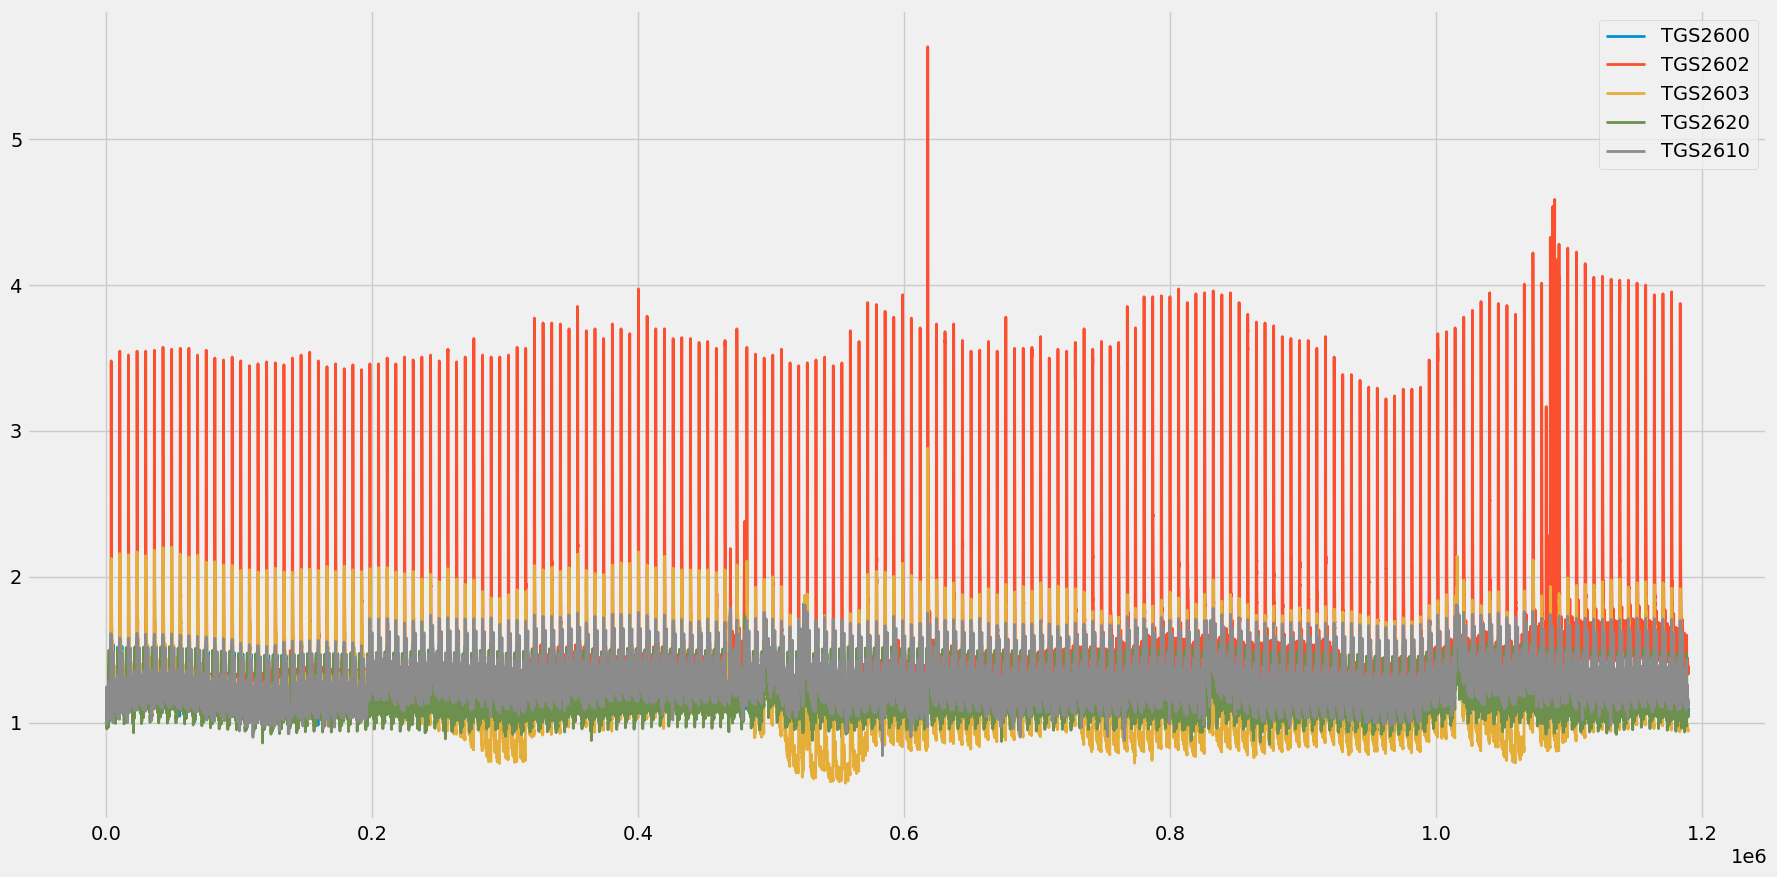

In [14]:
fig, axes = plt.subplots(
    1,
    figsize=(20,10), 
#     constrained_layout=True, 
#     sharex=True, 
#     sharey=True
)

for idx, sensor in enumerate(sensors):
    df_temp = df_TGS.copy()
    df_temp = df_temp[df_temp[sensor] != 0][[sensor, 'UNIXSTAMP']]
#     print(df_temp.iloc[0])
#     print(df_temp.iloc[0]['UNIXSTAMP'])
    df_temp['duration_sec'] = (df_temp['UNIXSTAMP']-df_temp.iloc[0]['UNIXSTAMP'])
    df_temp = df_temp
    df_temp = df_temp/df_temp.iloc[0][sensor]
#     df_temp = df_temp.set_index('duration_sec')
#     df_temp.info()
    
#     axes.figure(figsize=(20,3))
    axes.plot(df_temp.index, df_temp[sensor], linewidth=2, label=sensor)
    axes.legend()

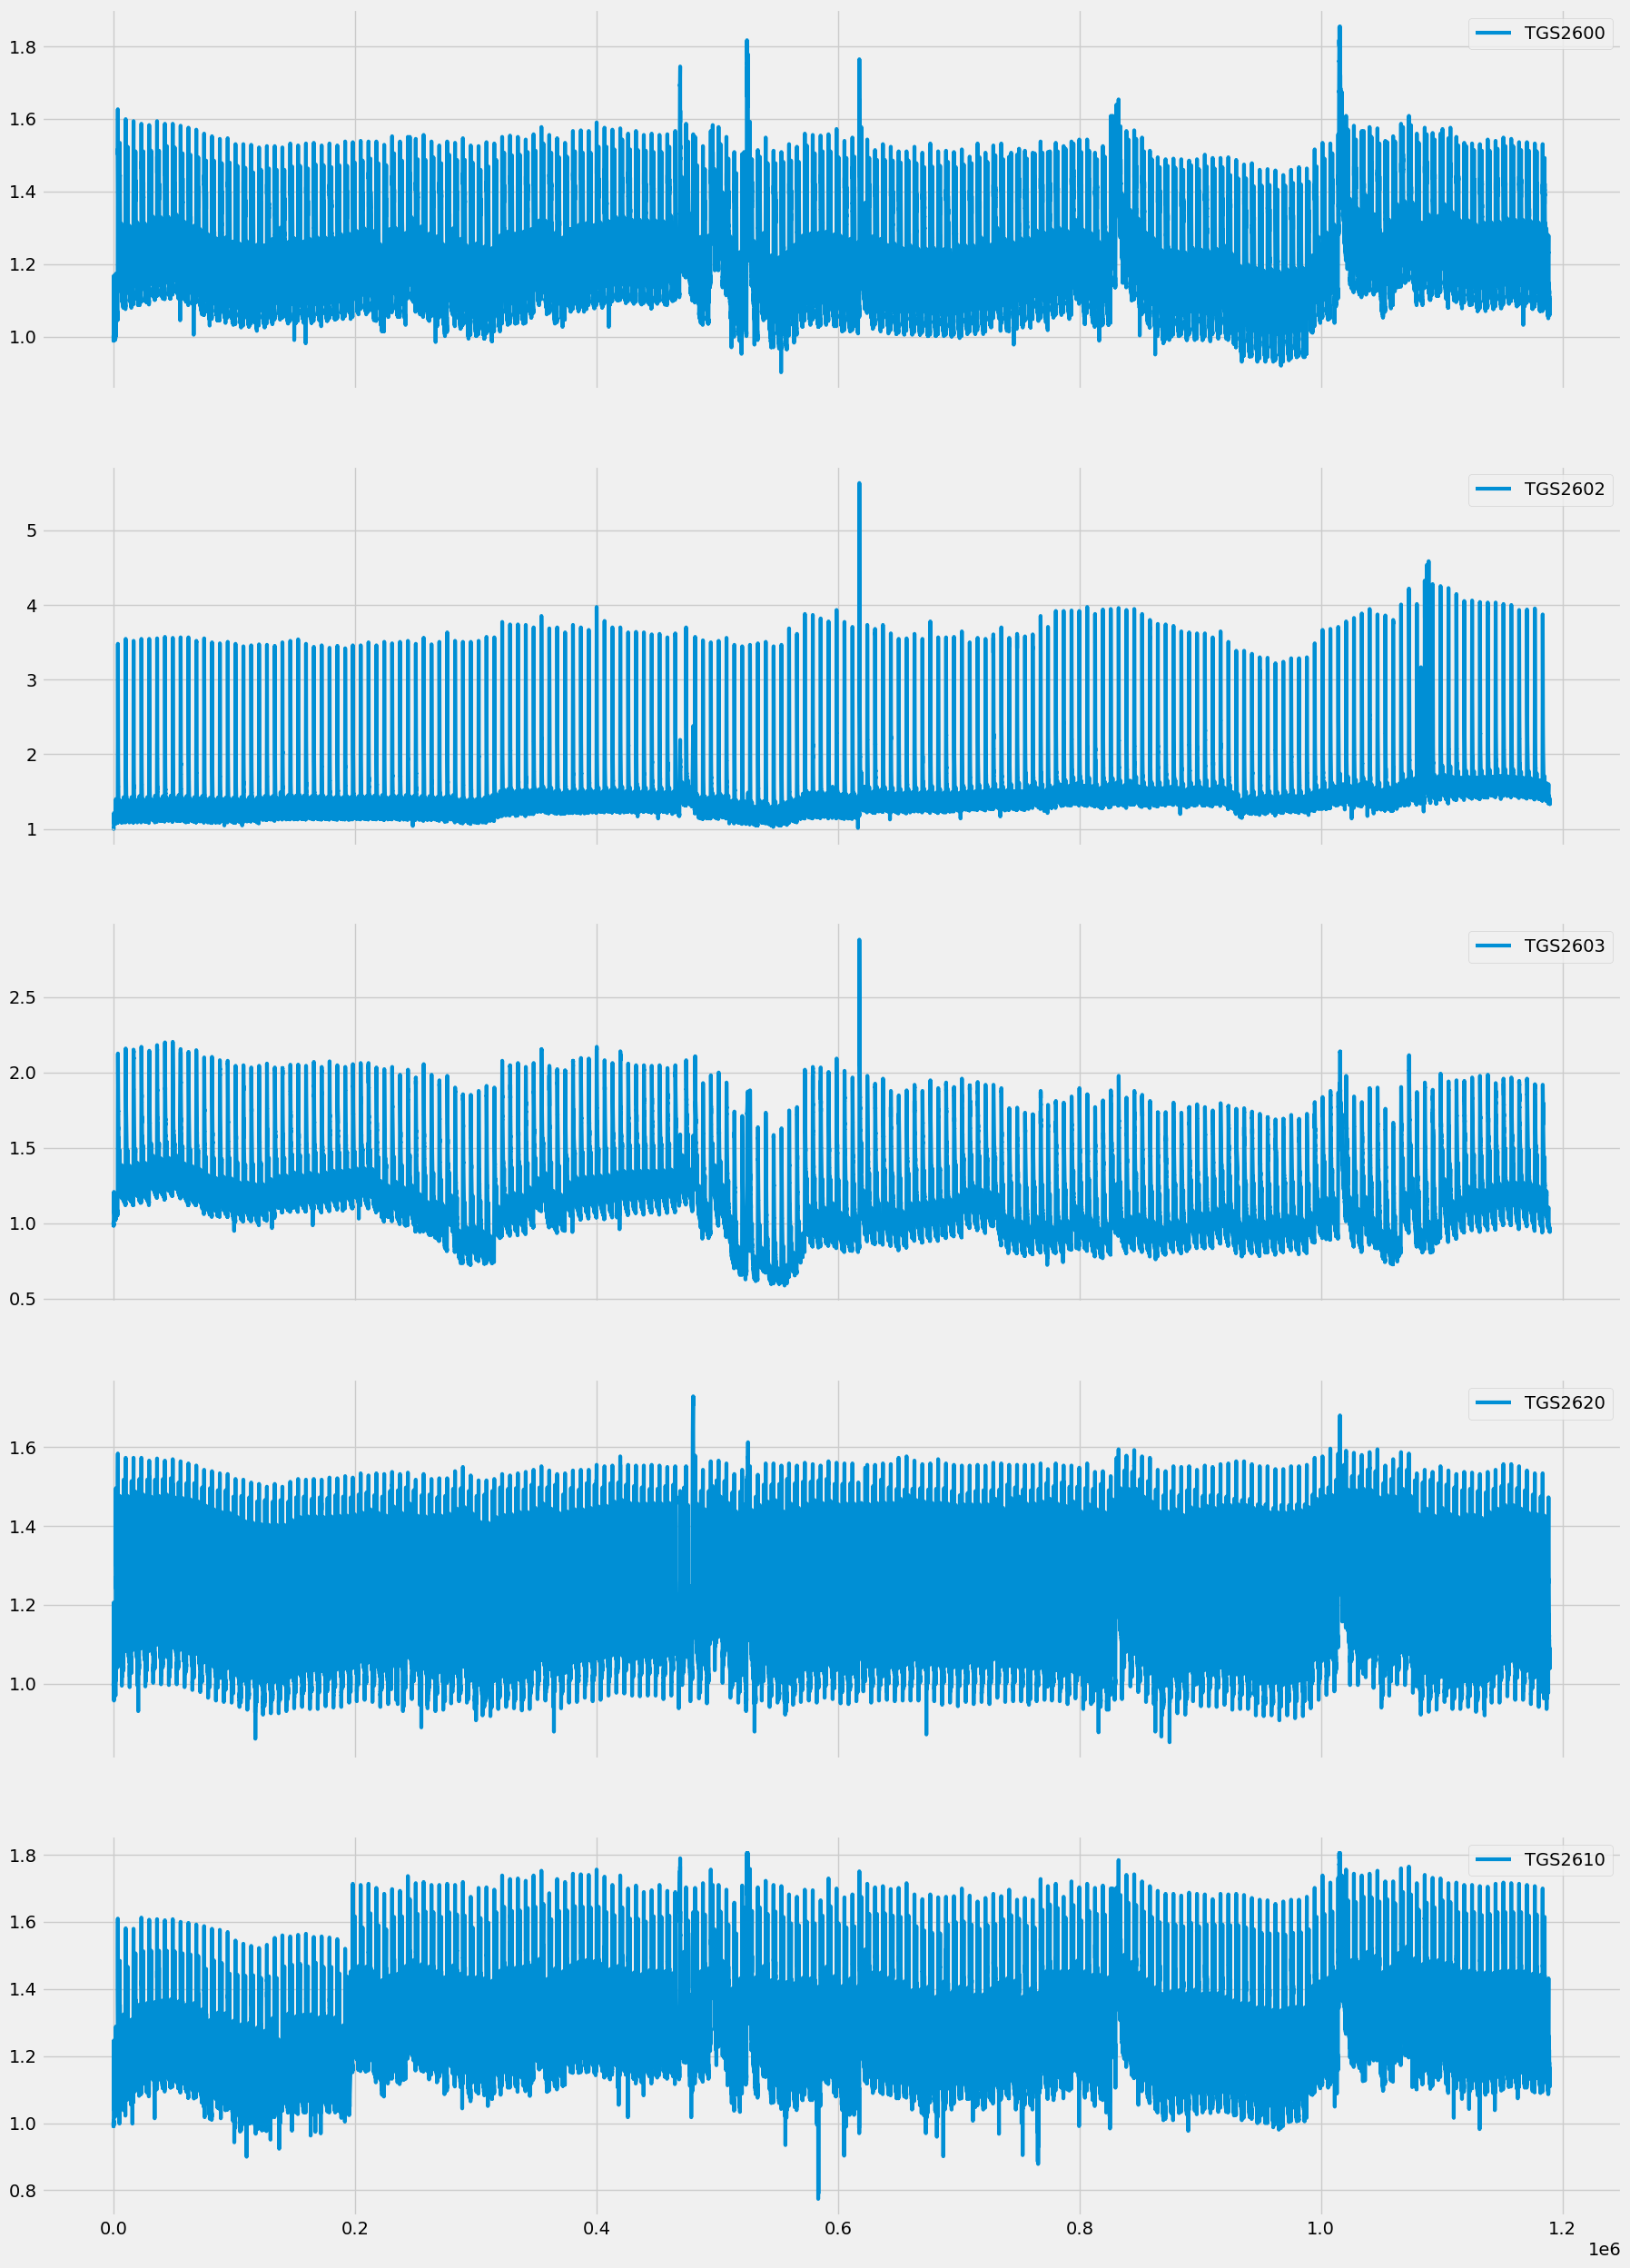

In [15]:
fig, axes = plt.subplots(
    len(sensors),
    figsize=(20,30), 
#     constrained_layout=True, 
    sharex=True, 
#     sharey=True
)

for idx, sensor in enumerate(sensors):
    df_temp = df_TGS.copy()
    df_temp = df_temp[df_temp[sensor] != 0][[sensor, 'UNIXSTAMP']]
#     print(df_temp.iloc[0])
#     print(df_temp.iloc[0]['UNIXSTAMP'])
    df_temp['duration_sec'] = (df_temp['UNIXSTAMP']-df_temp.iloc[0]['UNIXSTAMP'])
    df_temp = df_temp
    df_temp = df_temp/df_temp.iloc[0][sensor]
#     df_temp = df_temp.set_index('duration_sec')
#     df_temp.info()
    
    axes[idx].plot(df_temp.index, df_temp[sensor], linewidth=3, label=sensor)
    axes[idx].legend(loc="upper right")

In [16]:
df_Valve['Start_cycle'] = df_Valve['UNIXSTAMP']
df_Valve['Fan_on'] = df_Valve['UNIXSTAMP'].shift(-1)
df_Valve['End_cycle'] = df_Valve['UNIXSTAMP'].shift(-2)
df_Valve

,Unnamed: 0.1,Unnamed: 0,VALVE,STEP,FAN,TIMESTAMP,UNIXSTAMP,Start_cycle,Fan_on,End_cycle
0,0,0,0.0,0.0,0.0,43403161.0,1.683431e+09,1.683431e+09,1.683431e+09,1.683431e+09
1,1,1,0.0,1.0,1.0,43463702.0,1.683431e+09,1.683431e+09,1.683431e+09,1.683431e+09
2,2,2,1.0,0.0,0.0,43944548.0,1.683431e+09,1.683431e+09,1.683431e+09,1.683432e+09
3,3,3,1.0,1.0,1.0,44005675.0,1.683431e+09,1.683431e+09,1.683432e+09,1.683432e+09
4,4,4,2.0,0.0,0.0,44486332.0,1.683432e+09,1.683432e+09,1.683432e+09,1.683432e+09
...,...,...,...,...,...,...,...,...,...,...
1455,1455,1455,1.0,0.0,0.0,441309568.0,1.683828e+09,1.683828e+09,1.683828e+09,1.683829e+09
1456,1456,1456,1.0,1.0,1.0,441370279.0,1.683828e+09,1.683828e+09,1.683829e+09,1.683829e+09
1457,1457,1457,2.0,0.0,0.0,441851149.0,1.683829e+09,1.683829e+09,1.683829e+09,1.683829e+09
1458,1458,1458,2.0,1.0,1.0,441911952.0,1.683829e+09,1.683829e+09,1.683829e+09,NaN


In [17]:
df_Valve = df_Valve[:-2]
df_Valve

,Unnamed: 0.1,Unnamed: 0,VALVE,STEP,FAN,TIMESTAMP,UNIXSTAMP,Start_cycle,Fan_on,End_cycle
0,0,0,0.0,0.0,0.0,43403161.0,1.683431e+09,1.683431e+09,1.683431e+09,1.683431e+09
1,1,1,0.0,1.0,1.0,43463702.0,1.683431e+09,1.683431e+09,1.683431e+09,1.683431e+09
2,2,2,1.0,0.0,0.0,43944548.0,1.683431e+09,1.683431e+09,1.683431e+09,1.683432e+09
3,3,3,1.0,1.0,1.0,44005675.0,1.683431e+09,1.683431e+09,1.683432e+09,1.683432e+09
4,4,4,2.0,0.0,0.0,44486332.0,1.683432e+09,1.683432e+09,1.683432e+09,1.683432e+09
...,...,...,...,...,...,...,...,...,...,...
1453,1453,1453,0.0,0.0,0.0,440767273.0,1.683828e+09,1.683828e+09,1.683828e+09,1.683828e+09
1454,1454,1454,0.0,1.0,1.0,440828478.0,1.683828e+09,1.683828e+09,1.683828e+09,1.683828e+09
1455,1455,1455,1.0,0.0,0.0,441309568.0,1.683828e+09,1.683828e+09,1.683828e+09,1.683829e+09
1456,1456,1456,1.0,1.0,1.0,441370279.0,1.683828e+09,1.683828e+09,1.683829e+09,1.683829e+09


In [25]:
df_valve_edit = pd.DataFrame()
for i in range(0, len(df_Valve)):
    if (i % 2) == 0:
#         print(df_Valve.loc[i])
#         df_valve_edit = df_valve_edit.append(df_Valve.loc[i])
        pd.concat([df_valve_edit, df_Valve.loc[i]])
df_valve_edit

""


In [17]:
df_valve_edit = df_valve_edit[['VALVE', 'Start_cycle', 'Fan_on', 'End_cycle']]
df_valve_edit['CYCLE_DURATION'] = (df_valve_edit['End_cycle']-df_valve_edit['Start_cycle'])
df_valve_edit['FAN_ON_TIME'] = (df_valve_edit['Fan_on']-df_valve_edit['Start_cycle'])
df_valve_edit['REL_START_TIME'] = (df_valve_edit['Start_cycle']-df_valve_edit.iloc[0]['Start_cycle'])
df_valve_edit['RE_FAN_ON_TIME'] = (df_valve_edit['Fan_on']-df_valve_edit.iloc[0]['Start_cycle'])
df_valve_edit['RE_END_TIME'] = (df_valve_edit['End_cycle']-df_valve_edit.iloc[0]['Start_cycle'])
df_valve_edit = df_valve_edit.reset_index(drop=True)
df_valve_edit

,VALVE,Start_cycle,Fan_on,End_cycle,CYCLE_DURATION,FAN_ON_TIME,REL_START_TIME,RE_FAN_ON_TIME,RE_END_TIME
0,0.0,1.683431e+09,1.683431e+09,1.683431e+09,541.0,60.0,0.0,60.0,541.0
1,1.0,1.683431e+09,1.683431e+09,1.683432e+09,542.0,61.0,541.0,602.0,1083.0
2,2.0,1.683432e+09,1.683432e+09,1.683432e+09,541.0,61.0,1083.0,1144.0,1624.0
3,3.0,1.683432e+09,1.683432e+09,1.683433e+09,542.0,61.0,1624.0,1685.0,2166.0
4,0.0,1.683433e+09,1.683433e+09,1.683433e+09,541.0,60.0,2166.0,2226.0,2707.0
...,...,...,...,...,...,...,...,...,...
724,1.0,1.683826e+09,1.683827e+09,1.683827e+09,542.0,481.0,395797.0,396278.0,396339.0
725,2.0,1.683827e+09,1.683827e+09,1.683827e+09,541.0,480.0,396339.0,396819.0,396880.0
726,3.0,1.683827e+09,1.683828e+09,1.683828e+09,542.0,481.0,396880.0,397361.0,397422.0
727,0.0,1.683828e+09,1.683828e+09,1.683828e+09,542.0,481.0,397422.0,397903.0,397964.0


In [18]:
df_valve_edit = df_valve_edit[:100]

In [19]:
Condition = {
    0:'DW',
    1:'Acetic',
    2:'Benzaldehyde',
    3:'Keras',
}

0
1
2
3


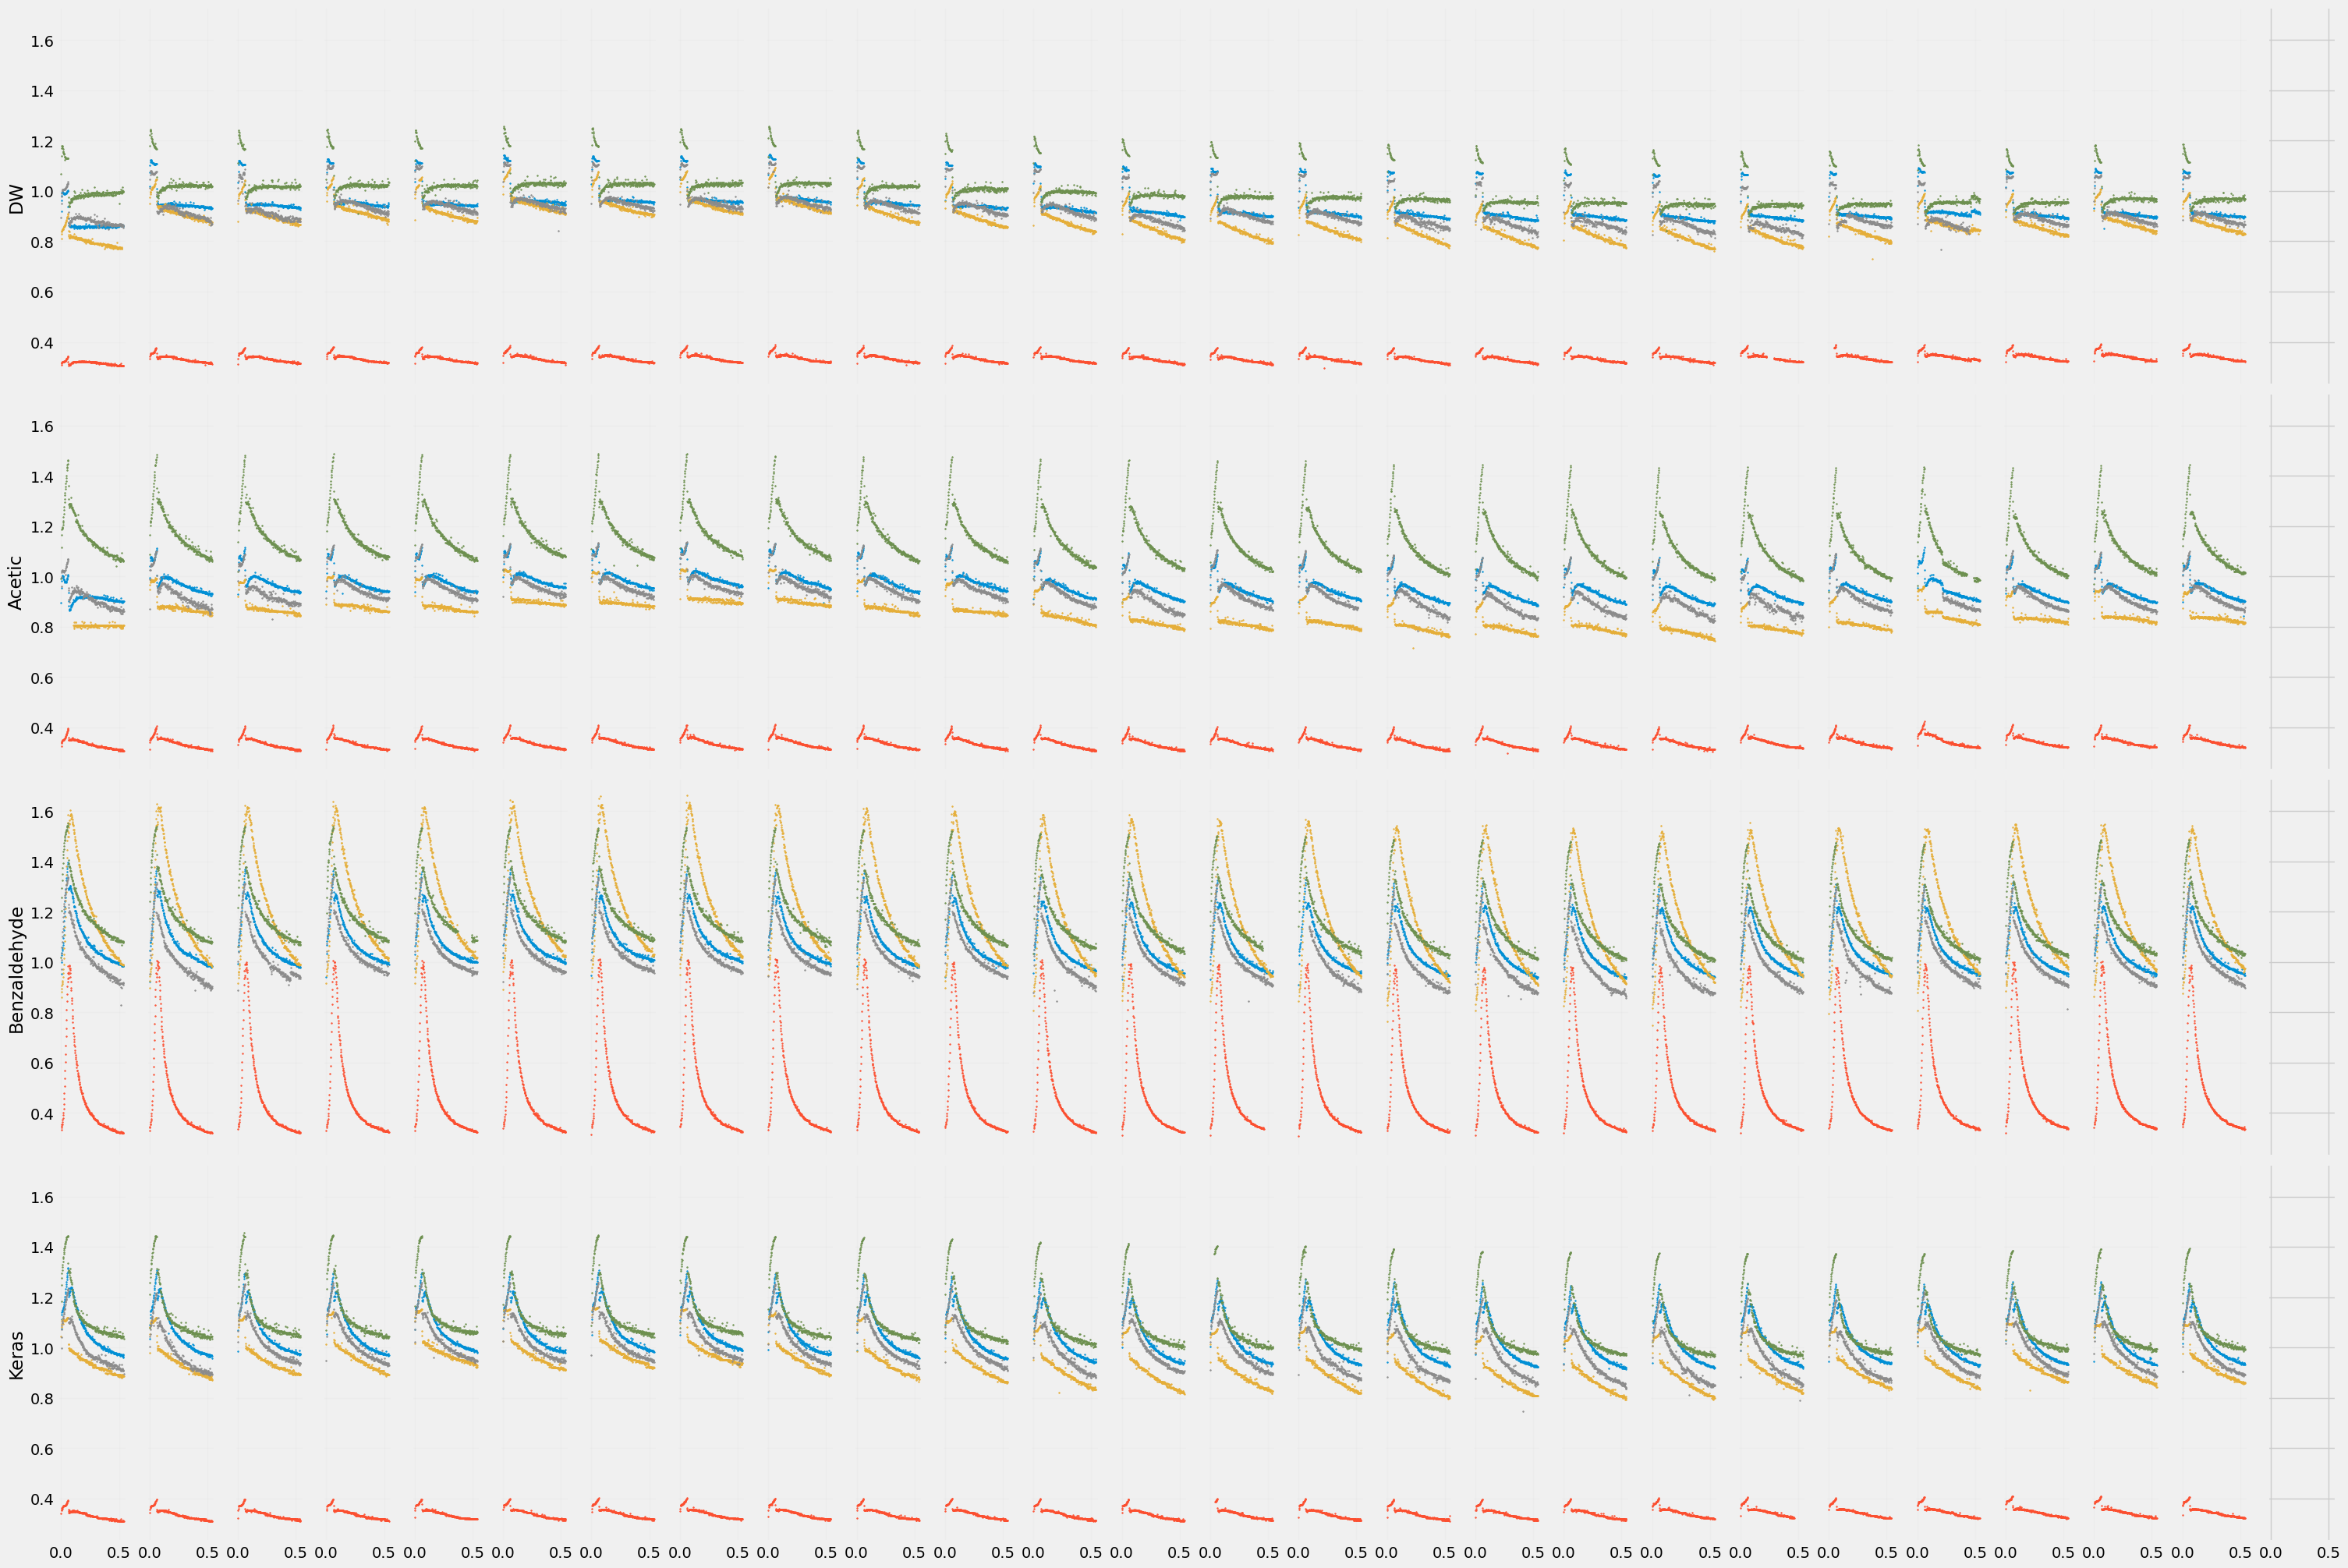

In [20]:
fig, axes = plt.subplots(
    nrows=len(Condition.keys()), 
    ncols=round(len(df_valve_edit)/len(Condition.keys())+1), 
    figsize=(30,20), 
    constrained_layout=True, 
    sharex=True, 
    sharey=True
)

#sensors = ['TGS2600', 'TGS2602', 'TGS2603','TGS2620','TGS2610','TGS822']
sensors = ['TGS2600', 'TGS2602', 'TGS2603','TGS2620','TGS2610']
# sensors = ['TGS2600', 'TGS2603','TGS2620','TGS2610']
for i in Condition.keys():
    print(i)
    df_valve_edit_temp = df_valve_edit[df_valve_edit['VALVE'] == i]
#     df_valve_edit_temp
    for j in range(len(df_valve_edit_temp)):
        df_temp = df_TGS[(df_TGS['UNIXSTAMP'] >= df_valve_edit_temp.iloc[j]['Start_cycle']) & 
                            (df_TGS['UNIXSTAMP'] < df_valve_edit_temp.iloc[j]['End_cycle'])]
        df_temp['DURATION_SEC'] = (df_temp['UNIXSTAMP'] - df_temp.iloc[0]['UNIXSTAMP'])/1000
        df_temp = df_temp.set_index('DURATION_SEC')

        for idx, sensor in enumerate(sensors):
#             axes[i][j].vlines(9,1,3, color="gray", alpha=0.2, linestyle='dotted')
#             df_temp = df_temp[df_temp[sensor] != 0]
            df_temp_temp = df_temp[df_temp[sensor]!=0][sensor]
#             df_temp_temp = df_temp_temp/df_temp_temp[df_temp_temp.index[0]]
#             print(df_temp_temp[df_temp_temp.index[0]])
#             print(df_temp_temp)
    
            axes[i][j].scatter(df_temp_temp.index, df_temp_temp, s=1.5, alpha=0.9, label=sensors[idx])
#             axes[i][j].set_ylim([-0.2, 2.0])
#             axes[i][j].grid(True, alpha=0.3)
            axes[i][j].grid(False, alpha=0.1)
#             axes[i][j].set_title("{}".format(df_valve_edit['VOC'].unique()[i]))
#             axes[i][j].set_title("{}".format(Condition[i]), fontsize=10, fontweight='bold')
#             axes[i][j].set_xlabel("Time(sec)")
#             axes[i][j].set_ylabel("Intensity")
#             print(j, idx, Condition[i])
            if j == 0 & idx == 0:
#                 axes[i][j].legend(loc="upper left", fontsize=8, markerscale=3)
#                 plt.setp(axes[-1, :], xlabel='Time(s)')
                plt.setp(axes[i][j], ylabel=Condition[i])
    # set labels
#     plt.setp(axes[-1, :], xlabel='Time(s)')
#     plt.setp(axes[:, 0], ylabel='Intensity')
#     plt.setp(axes[:, 0], ylabel=i)
#     plt.setp(axes[:, 0], ylabel='Intensity (__/__){}'.format(Condition[i]))

0
1
2
3


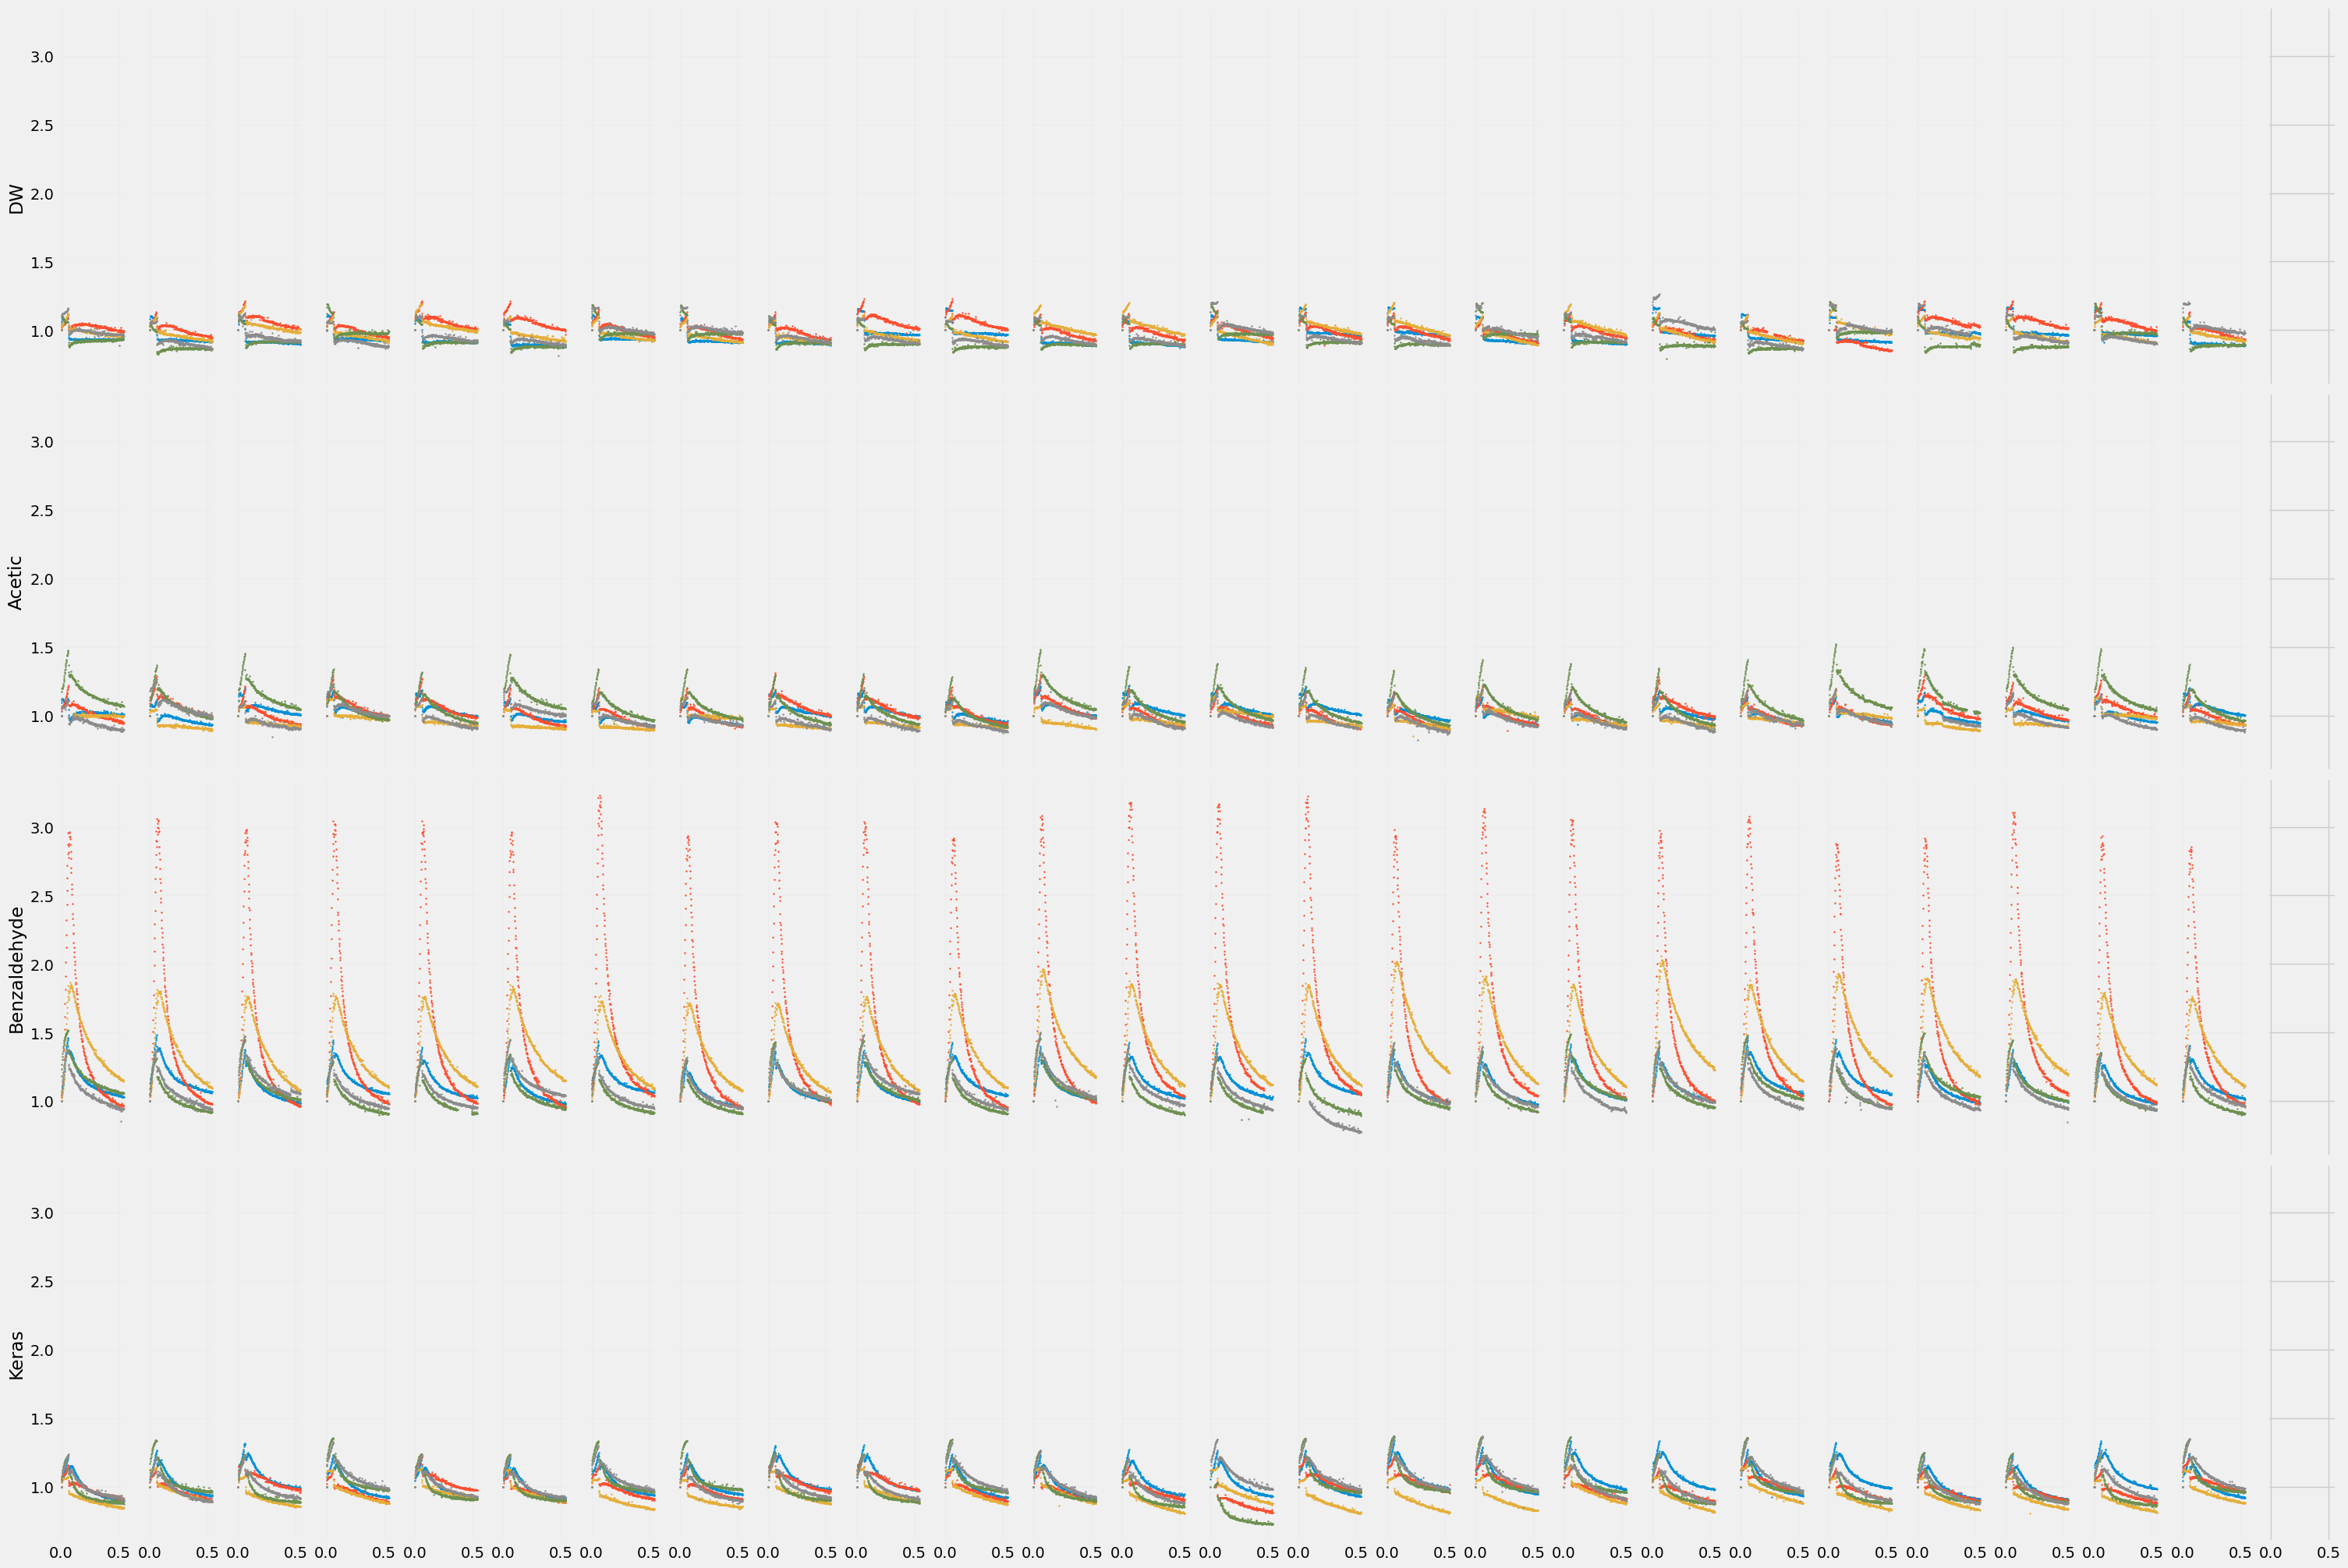

In [21]:
fig, axes = plt.subplots(
    nrows=len(Condition.keys()), 
    ncols=round(len(df_valve_edit)/len(Condition.keys())+1), 
    figsize=(30,20), 
    constrained_layout=True, 
    sharex=True, 
    sharey=True
)

#sensors = ['TGS2600', 'TGS2602', 'TGS2603','TGS2620','TGS2610','TGS822']
sensors = ['TGS2600', 'TGS2602', 'TGS2603','TGS2620','TGS2610']
# sensors = ['TGS2600', 'TGS2603','TGS2620','TGS2610']
for i in Condition.keys():
    print(i)
    df_valve_edit_temp = df_valve_edit[df_valve_edit['VALVE'] == i]
#     df_valve_edit_temp
    for j in range(len(df_valve_edit_temp)):
        df_temp = df_TGS[(df_TGS['UNIXSTAMP'] >= df_valve_edit_temp.iloc[j]['Start_cycle']) & 
                            (df_TGS['UNIXSTAMP'] < df_valve_edit_temp.iloc[j]['End_cycle'])]
        df_temp['DURATION_SEC'] = (df_temp['UNIXSTAMP'] - df_temp.iloc[0]['UNIXSTAMP'])/1000
        df_temp = df_temp.set_index('DURATION_SEC')

        for idx, sensor in enumerate(sensors):
#             axes[i][j].vlines(9,1,3, color="gray", alpha=0.2, linestyle='dotted')
#             df_temp = df_temp[df_temp[sensor] != 0]
            df_temp_temp = df_temp[df_temp[sensor]!=0][sensor]
            df_temp_temp = df_temp_temp/df_temp_temp[df_temp_temp.index[0]]
#             print(df_temp_temp[df_temp_temp.index[0]])
#             print(df_temp_temp)
    
            axes[i][j].scatter(df_temp_temp.index, df_temp_temp, s=1.5, alpha=0.9, label=sensors[idx])
#             axes[i][j].set_ylim([-0.2, 2.0])
#             axes[i][j].grid(True, alpha=0.3)
            axes[i][j].grid(False, alpha=0.1)
#             axes[i][j].set_title("{}".format(df_valve_edit['VOC'].unique()[i]))
#             axes[i][j].set_title("{}".format(Condition[i]), fontsize=10, fontweight='bold')
#             axes[i][j].set_xlabel("Time(sec)")
#             axes[i][j].set_ylabel("Intensity")
#             print(j, idx, Condition[i])
            if j == 0 & idx == 0:
#                 axes[i][j].legend(loc="upper left", fontsize=8, markerscale=3)
#                 plt.setp(axes[-1, :], xlabel='Time(s)')
                plt.setp(axes[i][j], ylabel=Condition[i])
    # set labels
#     plt.setp(axes[-1, :], xlabel='Time(s)')
#     plt.setp(axes[:, 0], ylabel='Intensity')
#     plt.setp(axes[:, 0], ylabel=i)
#     plt.setp(axes[:, 0], ylabel='Intensity (__/__){}'.format(Condition[i]))

0
1
2
3


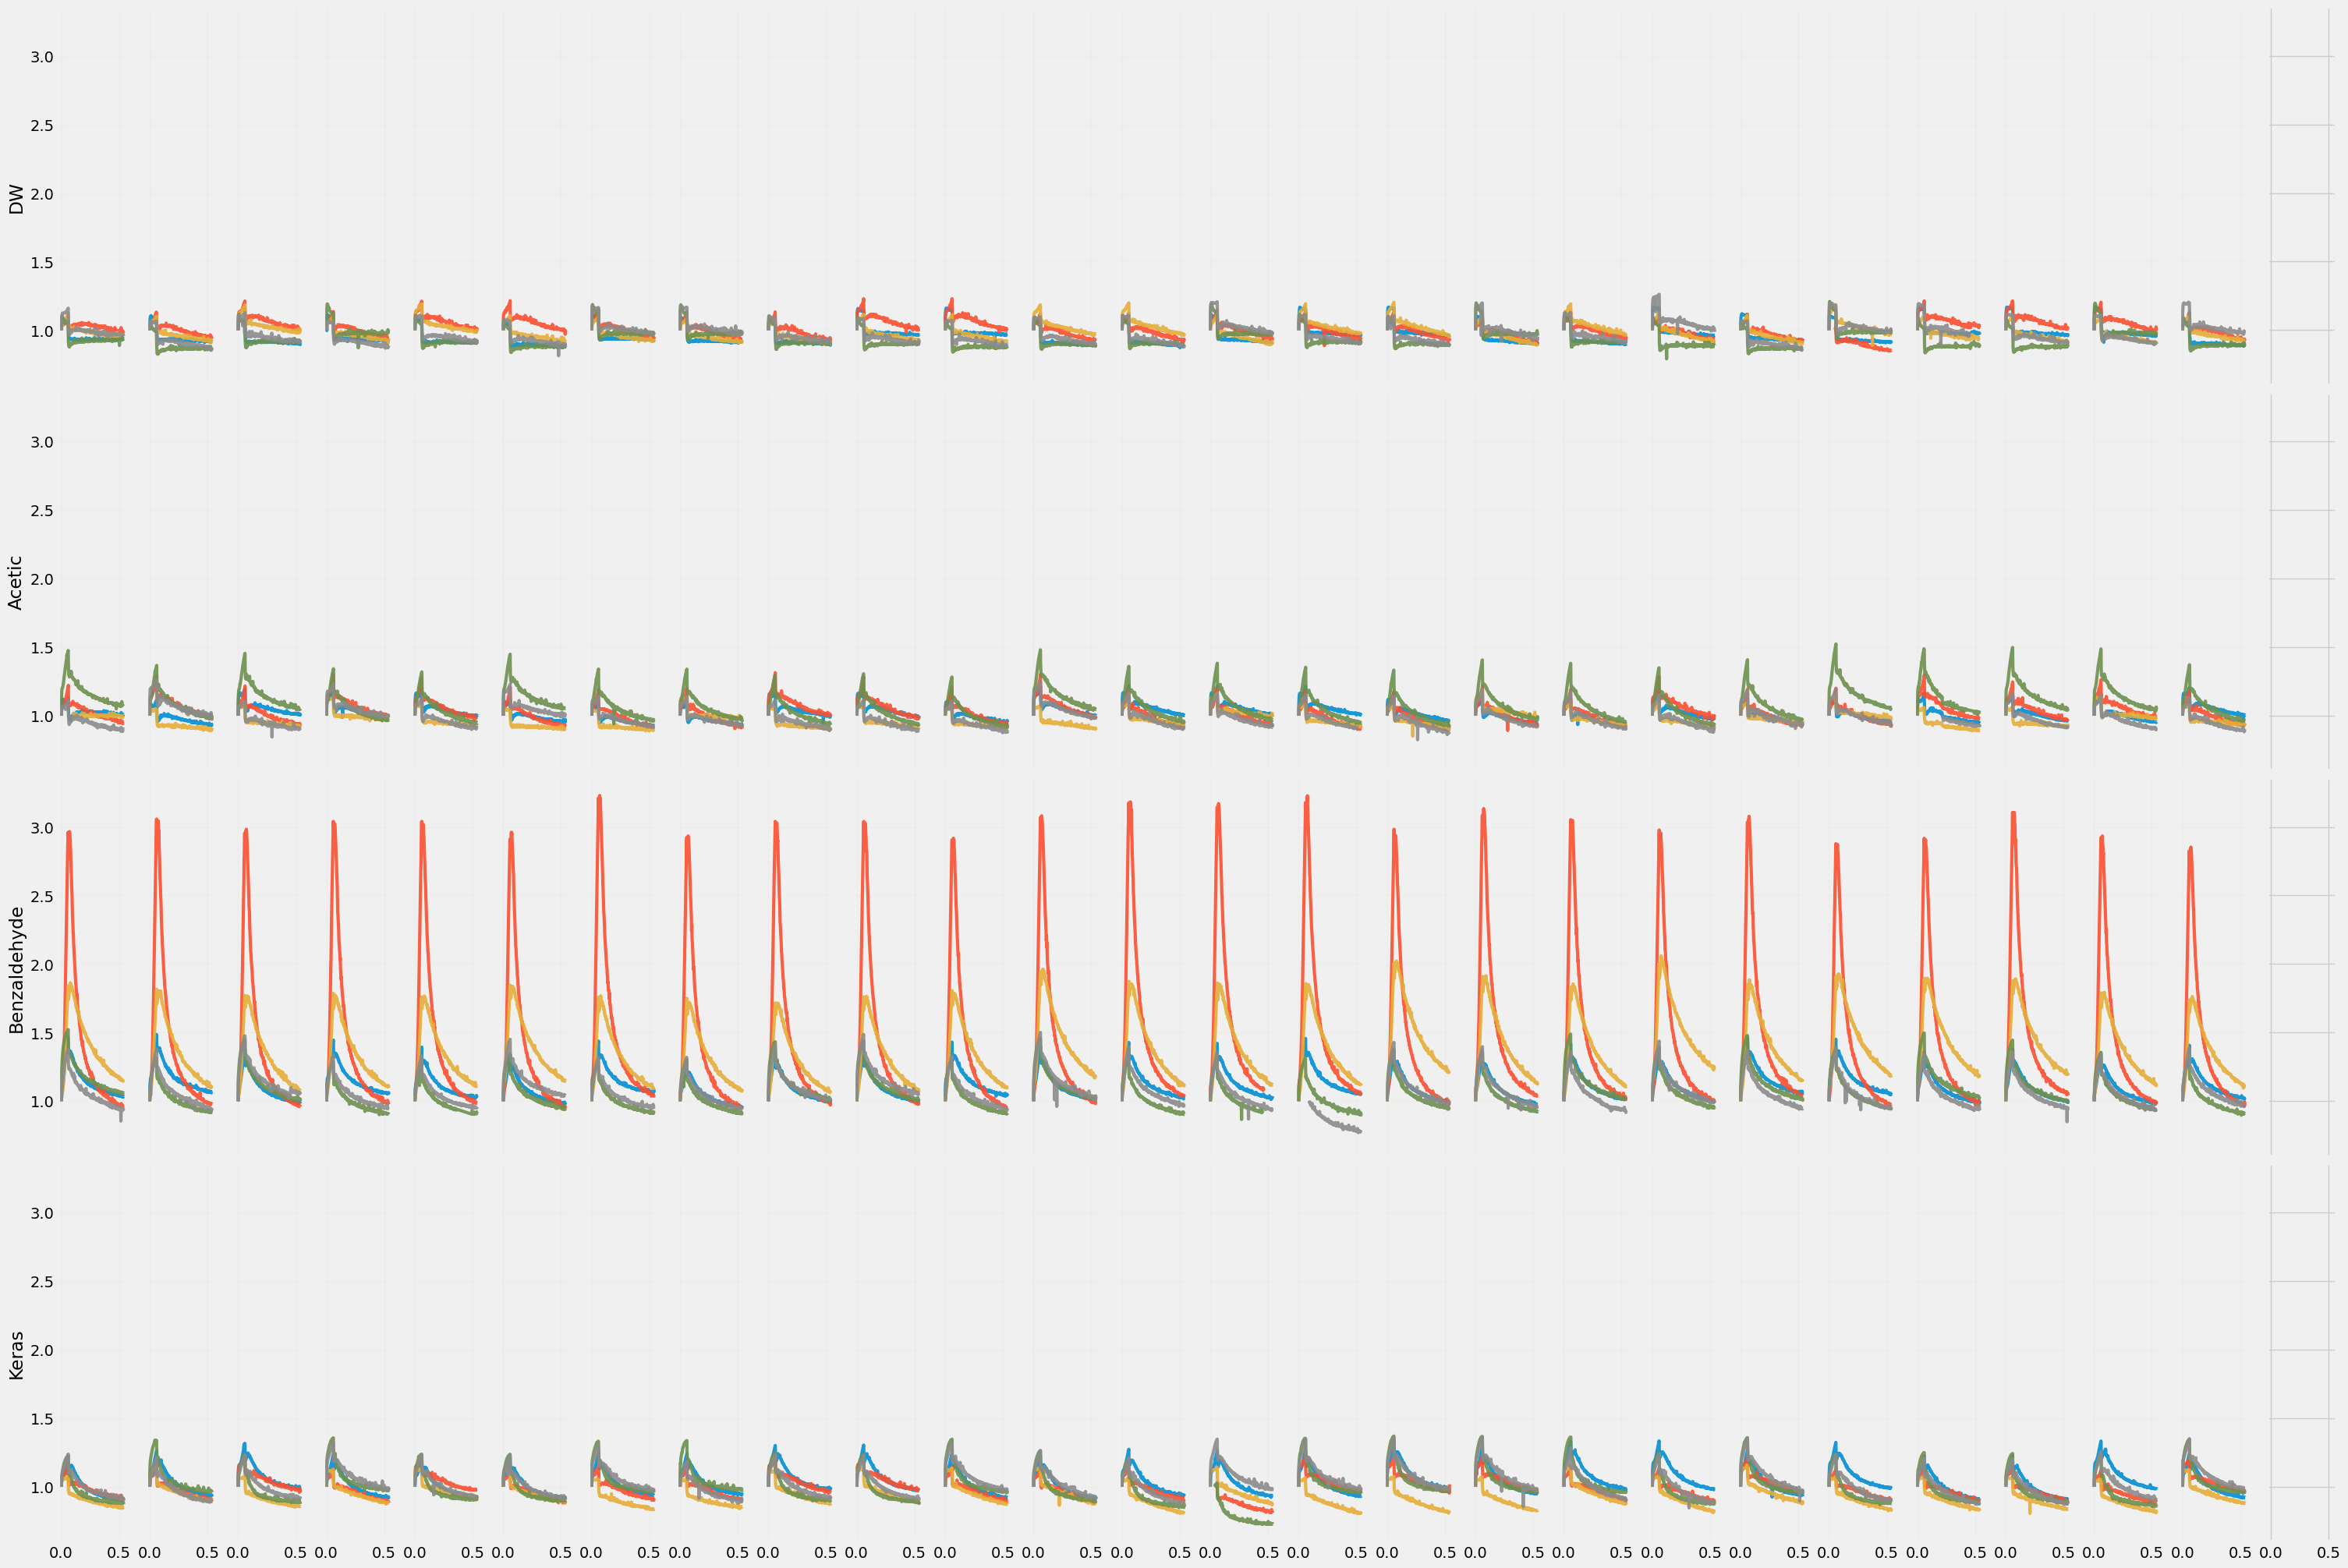

In [22]:
fig, axes = plt.subplots(
    nrows=len(Condition.keys()), 
    ncols=round(len(df_valve_edit)/len(Condition.keys())+1), 
    figsize=(30,20), 
    constrained_layout=True, 
    sharex=True, 
    sharey=True
)

#sensors = ['TGS2600', 'TGS2602', 'TGS2603','TGS2620','TGS2610','TGS822']
sensors = ['TGS2600', 'TGS2602', 'TGS2603','TGS2620','TGS2610']
for i in Condition.keys():
    print(i)
    df_valve_edit_temp = df_valve_edit[df_valve_edit['VALVE'] == i]
#     df_valve_edit_temp
    for j in range(len(df_valve_edit_temp)):
        df_temp = df_TGS[(df_TGS['UNIXSTAMP'] >= df_valve_edit_temp.iloc[j]['Start_cycle']) & 
                            (df_TGS['UNIXSTAMP'] < df_valve_edit_temp.iloc[j]['End_cycle'])]
        df_temp['DURATION_SEC'] = (df_temp['UNIXSTAMP'] - df_temp.iloc[0]['UNIXSTAMP'])/1000
        df_temp = df_temp.set_index('DURATION_SEC')

        for idx, sensor in enumerate(sensors):
#             axes[i][j].vlines(9,1,3, color="gray", alpha=0.2, linestyle='dotted')
#             df_temp = df_temp[df_temp[sensor] != 0]
            df_temp_temp = df_temp[df_temp[sensor]!=0][sensor]
            df_temp_temp = df_temp_temp/df_temp_temp[df_temp_temp.index[0]]
#             print(df_temp_temp[df_temp_temp.index[0]])
#             print(df_temp_temp)
    
            axes[i][j].plot(df_temp_temp.index, df_temp_temp, alpha=0.9, linewidth=3, label=sensors[idx])
#             axes[i][j].set_ylim([-0.2, 1.5])
#             axes[i][j].grid(True, alpha=0.3)
            axes[i][j].grid(False, alpha=0.1)
#             axes[i][j].set_title("{}".format(df_valve_edit['VOC'].unique()[i]))
#             axes[i][j].set_title("{}".format(Condition[i]), fontsize=10, fontweight='bold')
#             axes[i][j].set_xlabel("Time(sec)")
#             axes[i][j].set_ylabel("Intensity")
#             print(j, idx, Condition[i])
            if j == 0 & idx == 0:
#                 axes[i][j].legend(loc="upper left", fontsize=8, markerscale=3)
#                 plt.setp(axes[-1, :], xlabel='Time(s)')
                plt.setp(axes[i][j], ylabel=Condition[i])
    # set labels
#     plt.setp(axes[-1, :], xlabel='Time(s)')
#     plt.setp(axes[:, 0], ylabel='Intensity')
#     plt.setp(axes[:, 0], ylabel=i)
#     plt.setp(axes[:, 0], ylabel='Intensity (__/__){}'.format(Condition[i]))